In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_excel('/Users/joshitha/Downloads/Data.xlsx', skiprows=[1])

In [3]:
df.shape

(363, 68)

In [4]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q1', 'Q31', 'Q2', 'Q3', 'Q5',
       'Q6', 'Q6 CODE', 'Q7', 'Q7 CODE', 'Q8', 'Q9', 'Q10', 'Q11', 'Q11 CODE',
       'Q12', 'Q12 CODE', 'Q32', 'Q32 Code', 'Q33', 'Q13', 'Q13 CODE', 'Q14',
       'Q14 CODE', 'Q16', 'Q16 CODE', 'Q17', 'Q17 CODE', 'Q18', 'Q18 CODE',
       'Q19', 'Q19 CODE', 'Q20', 'Q20 CODE', 'Q22', 'Q22 CODE', 'Q23',
       'Q23 CODE', 'Q24', 'Q24 CODE', 'Q25', 'Q25 CODE', 'Q26', 'Q26 CODE',
       'Q27', 'Q27 CODE', 'Q28', 'Q28 CODE', 'Q29', 'Q29 CODE', 'Q30',
       'Q30 CODE'],
      dtype='object')

In [5]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q26,Q26 CODE,Q27,Q27 CODE,Q28,Q28 CODE,Q29,Q29 CODE,Q30,Q30 CODE
0,2020-03-04 16:15:00,2020-03-04 16:18:00,IP Address,50.234.115.104,100,131,True,2020-03-04 16:18:00,R_31QoBjUuzHTbsqV,NaN,...,Rarely,2,Rarely,2,Rarely,2,Rarely,2,Never,1
1,2020-03-05 09:49:00,2020-03-05 09:53:00,IP Address,50.234.115.107,100,230,True,2020-03-05 09:53:00,R_3fDBwxZZ5UjWkTL,NaN,...,Always,5,Never,1,Rarely,2,Often,4,Always,5
2,2020-03-06 11:30:00,2020-03-06 11:36:00,IP Address,71.206.59.235,100,307,True,2020-03-06 11:36:00,R_5ABgkao9Yd6RPgJ,NaN,...,Always,5,Never,1,Never,1,Often,4,Always,5
3,2020-03-08 17:21:00,2020-03-08 17:30:00,IP Address,151.196.6.96,100,531,True,2020-03-08 17:30:00,R_24BMNg1do0RN8bg,NaN,...,Never,1,Never,1,Always,5,Always,5,Always,5
4,2020-03-09 14:08:00,2020-03-09 14:14:00,IP Address,71.246.77.198,100,308,True,2020-03-09 14:14:00,R_2Rb1C4nCg2FE9ge,NaN,...,Sometimes,3,Rarely,2,Often,4,Always,5,Often,4


In [6]:
df.isnull().sum()

StartDate    0
EndDate      0
Status       0
IPAddress    0
Progress     0
            ..
Q28 CODE     0
Q29          0
Q29 CODE     0
Q30          0
Q30 CODE     0
Length: 68, dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

temp_series = df['Q8'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Gender distribution")

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

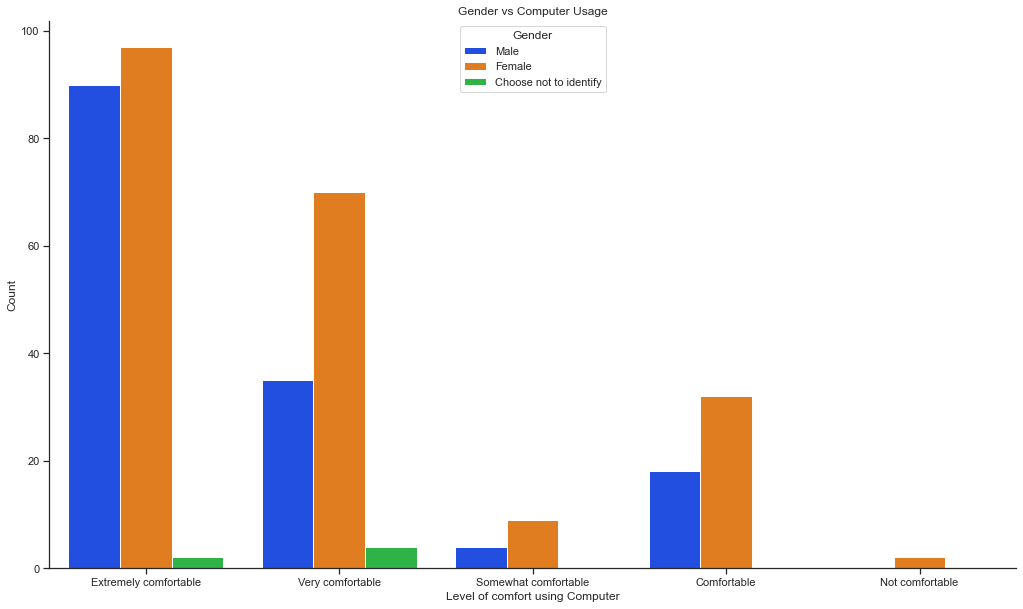

In [9]:
ax = sns.catplot(x="Q12", kind="count", palette="bright", hue="Q8", data=df, legend=False)
plt.legend(title='Gender')
ax.fig.set_figwidth(16.27)
ax.fig.set_figheight(8.7)
ax.set(xlabel='Level of comfort using Computer', ylabel='Count', title='Gender vs Computer Usage')

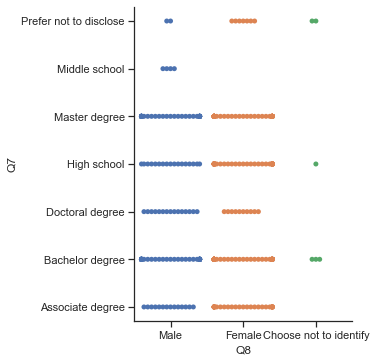

In [10]:
ax = sns.catplot(x="Q8", y="Q7", kind="swarm", data=df)

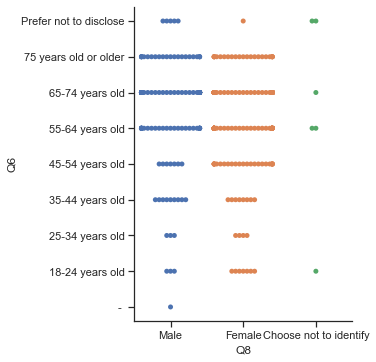

In [11]:
ax = sns.catplot(x="Q8", y="Q6", kind="swarm", data=df)

Text(0.5, 0.98, 'Device Securement')

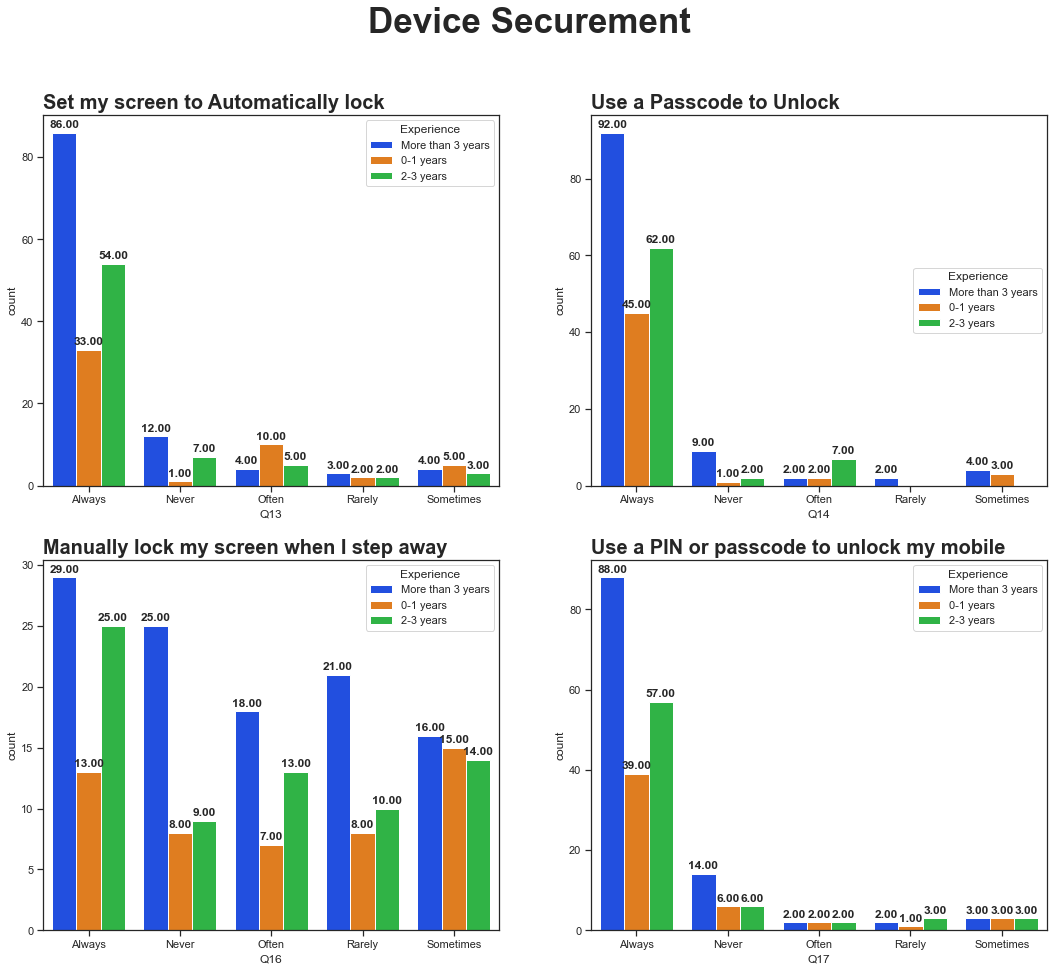

In [14]:
fig = plt.figure(figsize=(18, 15))

#  I set my computer screen to automatically lock (i.e., sleep) if I don’t use it for a prolonged period of time? 
plt.subplot(2,2,1)
plt.title('Set my screen to Automatically lock', loc='left', fontsize=20, fontweight='bold')
ax = sns.countplot(x='Q13', data=df, order=sorted(df['Q13'].unique()), hue='Q11', palette="bright")
ax.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

# I use a password/passcode to unlock my laptop or tablet. 
plt.subplot(2,2,2)
plt.title('Use a Passcode to Unlock', loc='left', fontsize=20, fontweight='bold')
ax = sns.countplot(x='Q14', data=df, order=sorted(df['Q14'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience', loc='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')
    
    
#  I manually lock my computer screen when I step away from it. 
plt.subplot(2,2,3)
plt.title('Manually lock my screen when I step away', loc='left', fontsize=20, fontweight='bold')
ax = sns.countplot(x='Q16', data=df, order=sorted(df['Q16'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

#I use a PIN or passcode to unlock my mobile phone. 
plt.subplot(2,2,4)
plt.title('Use a PIN or passcode to unlock my mobile', loc='left', fontsize=20, fontweight='bold')
ax = sns.countplot(x='Q17', data=df, order=sorted(df['Q17'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')


plt.savefig('Device Securement.png')
fig.suptitle("Device Securement", fontsize=35, fontweight='bold')

Text(0.5, 0.98, 'PasswordGeneration')

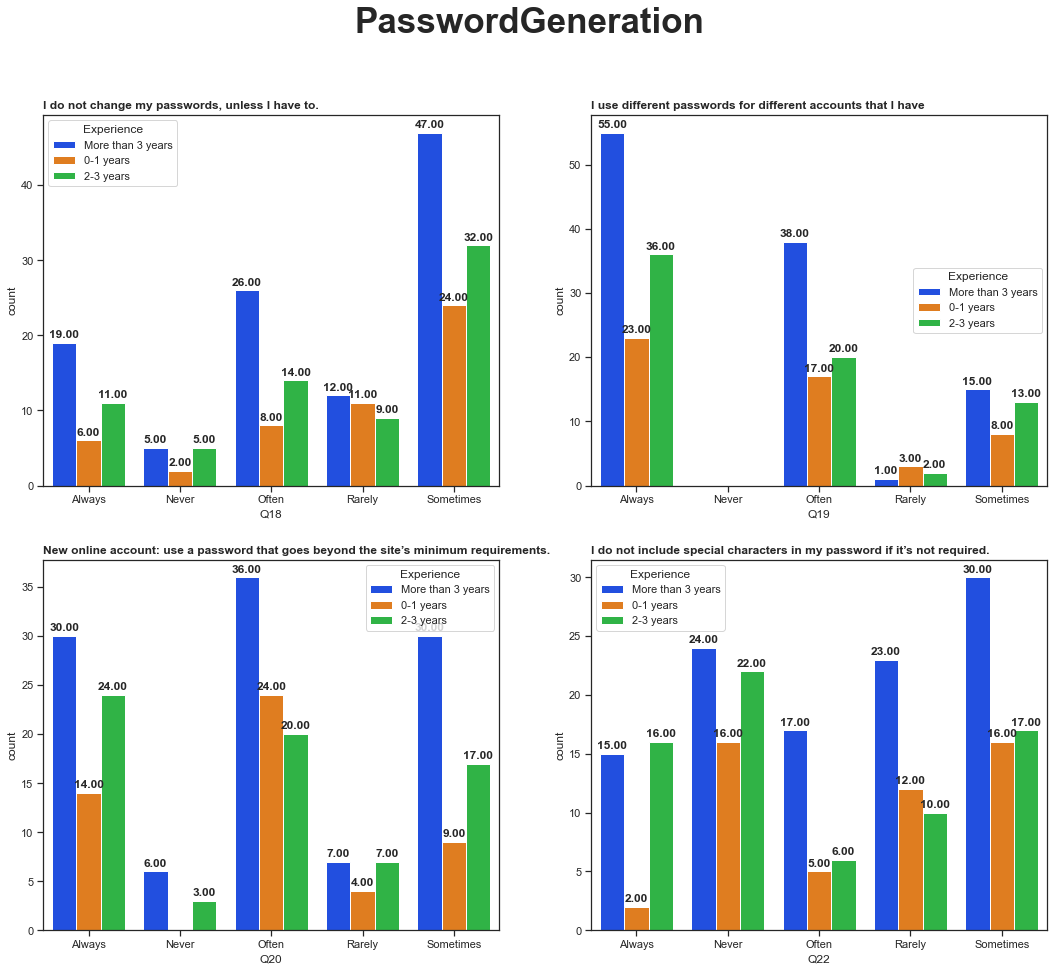

In [20]:
fig = plt.figure(figsize=(18, 15))

#  I do not change my passwords, unless I have to. 
plt.subplot(2,2,1)
plt.title('I do not change my passwords, unless I have to.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q18', data=df, order=sorted(df['Q18'].unique()), hue='Q11', palette="bright")
ax.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

# I use different passwords for different accounts that I have 
plt.subplot(2,2,2)
plt.title('I use different passwords for different accounts that I have', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q19', data=df, order=sorted(df['Q19'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience', loc='right')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')
    
    
#  When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.
plt.subplot(2,2,3)
plt.title('New online account: use a password that goes beyond the site’s minimum requirements.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q20', data=df, order=sorted(df['Q20'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

# I do not include special characters in my password if it’s not required.
plt.subplot(2,2,4)
plt.title('I do not include special characters in my password if it’s not required.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q22', data=df, order=sorted(df['Q22'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')


plt.savefig('PasswordGeneration.png')
fig.suptitle("PasswordGeneration", fontsize=35, fontweight='bold')

Text(0.5, 0.98, 'Proactive Awareness')

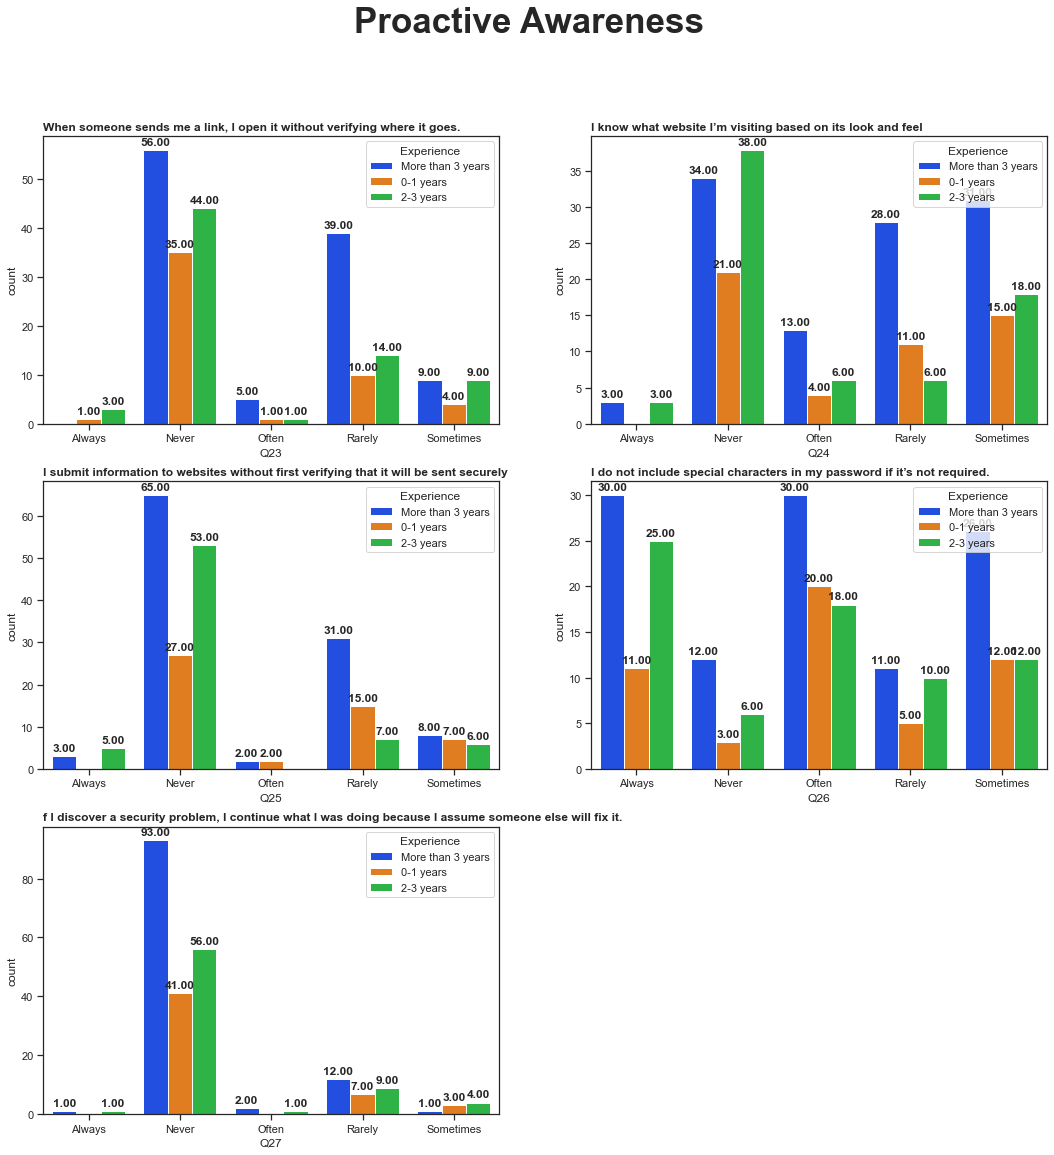

In [22]:
fig = plt.figure(figsize=(18, 18))

#  When someone sends me a link, I open it without verifying where it goes.
plt.subplot(3,2,1)
plt.title('When someone sends me a link, I open it without verifying where it goes.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q23', data=df, order=sorted(df['Q23'].unique()), hue='Q11', palette="bright")
ax.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

#  I know what website I’m visiting based on its look and feel, rather than by looking at the URL bar.
plt.subplot(3,2,2)
plt.title('I know what website I’m visiting based on its look and feel', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q24', data=df, order=sorted(df['Q24'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience', loc='upper right')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')
    
    
#  I submit information to websites without first verifying that it will be sent securely (e.g., SSL, “https://”, a lock icon).
plt.subplot(3,2,3)
plt.title('I submit information to websites without first verifying that it will be sent securely', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q25', data=df, order=sorted(df['Q25'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

# When browsing websites, I mouse over links to see where they go, before clicking them.
plt.subplot(3,2,4)
plt.title('I do not include special characters in my password if it’s not required.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q26', data=df, order=sorted(df['Q26'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

# If I discover a security problem, I continue what I was doing because I assume someone else will fix it.
plt.subplot(3,2,5)
plt.title('f I discover a security problem, I continue what I was doing because I assume someone else will fix it.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q27', data=df, order=sorted(df['Q27'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')
    
plt.savefig('Proactive Awareness.png')
fig.suptitle("Proactive Awareness", fontsize=35, fontweight='bold')

Text(0.5, 0.98, 'Updating')

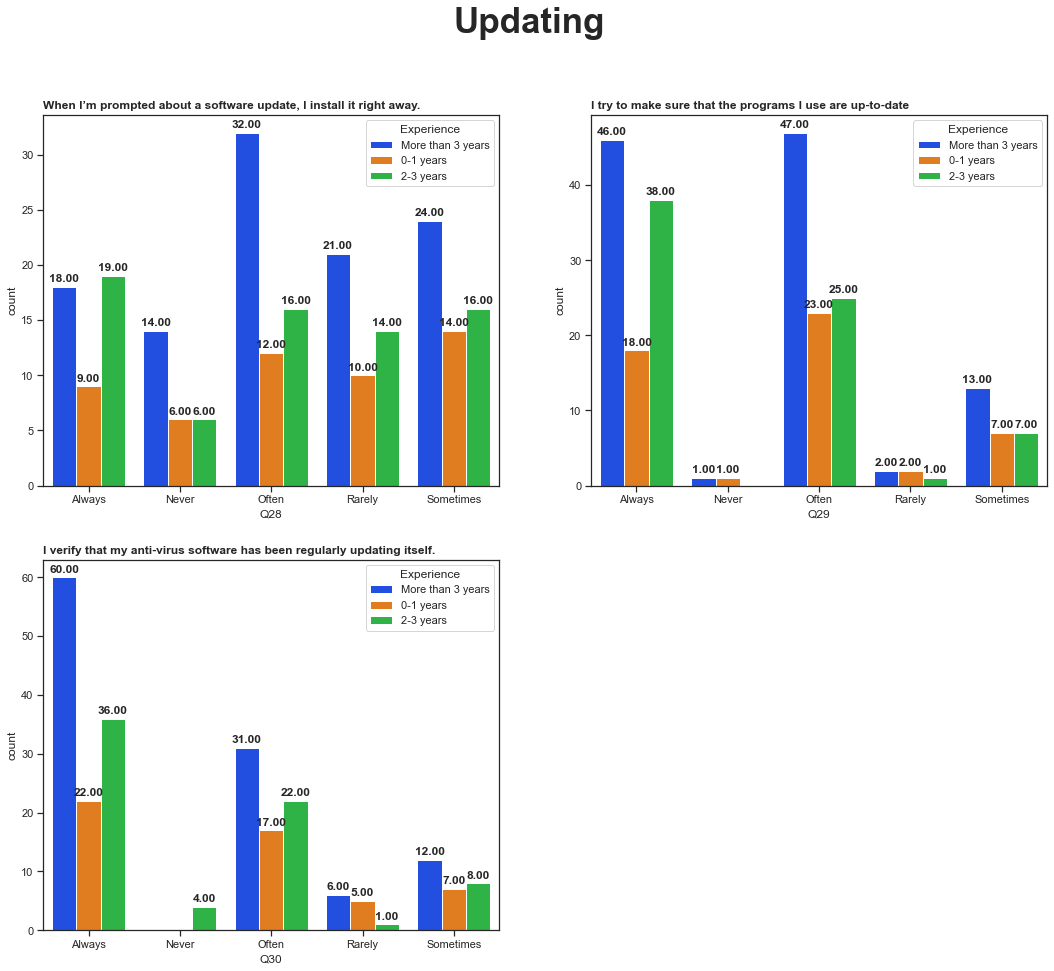

In [24]:
fig = plt.figure(figsize=(18, 15))

#  When I’m prompted about a software update, I install it right away.
plt.subplot(2,2,1)
plt.title('When I’m prompted about a software update, I install it right away.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q28', data=df, order=sorted(df['Q28'].unique()), hue='Q11', palette="bright")
ax.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')

#  I try to make sure that the programs I use are up-to-date
plt.subplot(2,2,2)
plt.title('I try to make sure that the programs I use are up-to-date', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q29', data=df, order=sorted(df['Q29'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience', loc='upper right')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')
    
    
#  I verify that my anti-virus software has been regularly updating itself.
plt.subplot(2,2,3)
plt.title('I verify that my anti-virus software has been regularly updating itself.', loc='left', fontsize=12, fontweight='bold')
ax = sns.countplot(x='Q30', data=df, order=sorted(df['Q30'].unique()), hue='Q11', palette="bright")
plt.legend(title='Experience')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points', fontweight='bold')
    
plt.savefig('Updating.png')
fig.suptitle("Updating", fontsize=35, fontweight='bold')